<a href="https://colab.research.google.com/github/sukhyun1017/NLP-study/blob/main/4_NLP_%EB%84%A4%EA%B1%B0%ED%8B%B0%EB%B8%8C%EC%83%98%ED%94%8C%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

워드투벡터

In [ ]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7f5e9e1dbc50>)

In [ ]:
#XML 데이터 전처리 이 부분은 나중에 공부해요 
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [ ]:
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, size=100, window=5, min_count=5, workers=4, sg=0)
#size 임베딩된 벡터의 차원
#window = 윈도우 크기
#min_count = 단어 최소 빈도수 제한
#workers = 학습을 위한 프로세스 수
#sg=0 CBOW / 1은 Skip-gram

In [ ]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8413915634155273), ('guy', 0.8157853484153748), ('lady', 0.7810308337211609), ('girl', 0.751625657081604), ('boy', 0.7503243684768677), ('gentleman', 0.7395673990249634), ('soldier', 0.7392462491989136), ('kid', 0.7125502824783325), ('poet', 0.6986170411109924), ('writer', 0.6624590158462524)]


In [ ]:
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v")

In [ ]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8413915634155273), ('guy', 0.8157853484153748), ('lady', 0.7810308337211609), ('girl', 0.751625657081604), ('boy', 0.7503243684768677), ('gentleman', 0.7395673990249634), ('soldier', 0.7392462491989136), ('kid', 0.7125502824783325), ('poet', 0.6986170411109924), ('writer', 0.6624590158462524)]


네거티브 샘플링

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
#sklearn dataset 사용
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('총 샘플 수 :',len(documents))

총 샘플 수 : 11314


In [3]:
news_df = pd.DataFrame({'document':documents})

In [4]:
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거) #한칸 띄어서 join 시킴
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [5]:
news_df

,document,clean_doc
0,Well i'm not sure about the story nad it did s...,well sure about story seem biased what disagre...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re...",yeah expect people read actually accept hard a...
2,Although I realize that principle is not one o...,although realize that principle your strongest...
3,Notwithstanding all the legitimate fuss about ...,notwithstanding legitimate fuss about this pro...
4,"Well, I will have to change the scoring on my ...",well will have change scoring playoff pool unf...
...,...,...
11309,"Danny Rubenstein, an Israeli journalist, will ...",danny rubenstein israeli journalist will speak...
11310,\n,
11311,\nI agree. Home runs off Clemens are always m...,agree home runs clemens always memorable kinda...
11312,I used HP DeskJet with Orange Micros Grappler ...,used deskjet with orange micros grappler syste...


In [6]:
news_df.isnull().values.any()

False

In [7]:
#empty 값 확인
news_df.replace("", float("NaN"), inplace=True)
news_df.isnull().values.any()

True

In [8]:
news_df.dropna(inplace=True)
print('총 샘플 수 :',len(news_df))

총 샘플 수 : 10995


In [11]:
# 불용어를 제거
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) # lambda 에서 x 가 news_df가 되는군
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc = tokenized_doc.to_list() #하나의 리스트로 묶음 (이차원형태)

In [12]:
drop_train = [index for index, sentence in enumerate(tokenized_doc) if len(sentence) <= 1]
tokenized_doc = np.delete(tokenized_doc, drop_train, axis=0)
print('총 샘플 수 :',len(tokenized_doc))

총 샘플 수 : 10940


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [13]:
a=[[1,2,3],[4,5,6]]
np.delete(a,[1],axis=1)

array([[1, 3],
       [4, 6]])

In [14]:
#정수인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

word2idx = tokenizer.word_index
idx2word = {value : key for key, value in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)

In [15]:
vocab_size = len(word2idx) + 1  #패딩을 위해 +1
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 64277


네거티브 샘플링 구현

In [16]:
from tensorflow.keras.preprocessing.sequence import skipgrams
# 네거티브 샘플링
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:10]]

In [17]:
# 첫번째 샘플인 skip_grams[0] 내 skipgrams로 형성된 데이터셋 확인
pairs, labels = skip_grams[0][0], skip_grams[0][1]
print(pairs[:5])
print(labels[:5])
for i in range(5):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          idx2word[pairs[i][0]], pairs[i][0], 
          idx2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

[[207, 20294], [1920, 755], [217, 70], [66, 43253], [1495, 43825]]
[1, 1, 1, 0, 0]
(seem (207), incidences (20294)) -> 1
(daily (1920), reports (755)) -> 1
(whole (217), world (70)) -> 1
(look (66), wien (43253)) -> 0
(disagree (1495), mmzvwmq (43825)) -> 0


In [18]:
print('전체 샘플 수 :',len(skip_grams))

전체 샘플 수 : 10


In [19]:
print(len(pairs))
print(len(labels))

2220
2220


In [20]:
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded]

In [22]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

In [24]:
embedding_dim = 100

# 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1, ), dtype='int32')
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)

# 주변 단어를 위한 임베딩 테이블
c_inputs = Input(shape=(1, ), dtype='int32')
context_embedding  = Embedding(vocab_size, embedding_dim)(c_inputs)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 100)       6427700     ['input_3[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 1, 100)       6427700     ['input_4[0][0]']                
                                                                                              

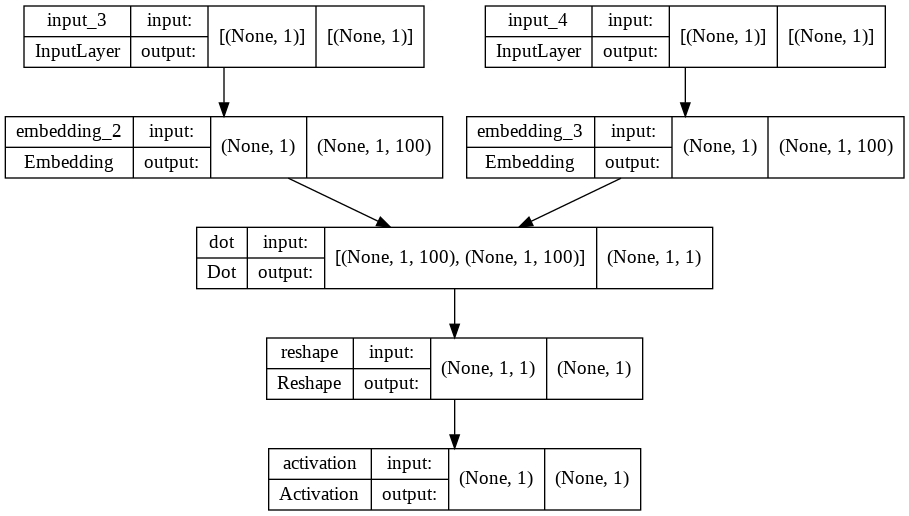

In [25]:
dot_product = Dot(axes=2)([word_embedding, context_embedding]) #dot_layer
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)   #Reshape_layer
output = Activation('sigmoid')(dot_product)

model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True, rankdir='TB')
# outputshape = ( batch_size,timesteps,output_dim)

In [26]:
for epoch in range(1, 6):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32') #중심단어 아래 셀 확인
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32') #주변단어
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X,Y)  #fit 이 아닌 train_on_batch 사용
    print('Epoch :',epoch, 'Loss :',loss)
#https://stackoverflow.com/questions/49100556/what-is-the-use-of-train-on-batch-in-keras

Epoch : 1 Loss : 4630.9161014817655
Epoch : 2 Loss : 3664.009560097009
Epoch : 3 Loss : 3498.7164762113243
Epoch : 4 Loss : 3292.4390636291355
Epoch : 5 Loss : 3068.66320200637


In [58]:
numbers = (1, 2, 3)
letters = ("A", "B", "C")
pairs = list(zip(numbers, letters))
print(pairs)
print(list(zip(*pairs))[0])

[(1, 'A'), (2, 'B'), (3, 'C')]
(1, 2, 3)


In [60]:
import gensim

f = open('vectors.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, 100))
vectors = model.get_weights()[0] 
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i])))))
f.close()

# 모델 로드
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)
#https://radimrehurek.com/gensim_3.8.3/models/keyedvectors.html

In [41]:
print(len(model.get_weights()[0])) #중심단어
print(len(model.get_weights()[1])) #주변단어

64277

In [ ]:
list(vectors[1,:])

In [30]:
w2v.most_similar(positive=['soldiers'])


[('terrorism', 0.838767945766449),
 ('villages', 0.809255838394165),
 ('israelis', 0.8042406439781189),
 ('forces', 0.7978554368019104),
 ('shelling', 0.786234974861145),
 ('wounded', 0.7841538190841675),
 ('treaty', 0.7824079990386963),
 ('syria', 0.7822006940841675),
 ('iraq', 0.7816295623779297),
 ('terrorist', 0.7794439196586609)]

In [31]:
w2v.most_similar(positive=['doctor'])

[('patient', 0.5771385431289673),
 ('blood', 0.5726695656776428),
 ('therapy', 0.5706654787063599),
 ('medication', 0.5616329908370972),
 ('treatments', 0.5516576766967773),
 ('disease', 0.5372233390808105),
 ('diagnosed', 0.536700963973999),
 ('clinic', 0.5355968475341797),
 ('cure', 0.519145131111145),
 ('stomach', 0.5165364742279053)]

In [32]:
w2v.most_similar(positive=['police'])

[('officers', 0.6175291538238525),
 ('constitutional', 0.5896588563919067),
 ('united', 0.5848321914672852),
 ('imposed', 0.5754684209823608),
 ('firearms', 0.5648787021636963),
 ('nads', 0.5571141242980957),
 ('criminals', 0.5493741631507874),
 ('foreign', 0.548302173614502),
 ('politicians', 0.5467678308486938),
 ('disarming', 0.5418440699577332)]

In [33]:
w2v.most_similar(positive=['knife'])

[('speculations', 0.6807966828346252),
 ('hussein', 0.6793330907821655),
 ('deprived', 0.6769877076148987),
 ('glorification', 0.6760607361793518),
 ('cease', 0.6688245534896851),
 ('palatable', 0.6671169400215149),
 ('civil', 0.6669610738754272),
 ('democracy', 0.66351318359375),
 ('jokes', 0.6633836030960083),
 ('occupying', 0.6606791615486145)]